Lab-07: Write a program to display the following region of a speech signal.
• Voiced region.
• Unvoiced region.
• Silenced region.

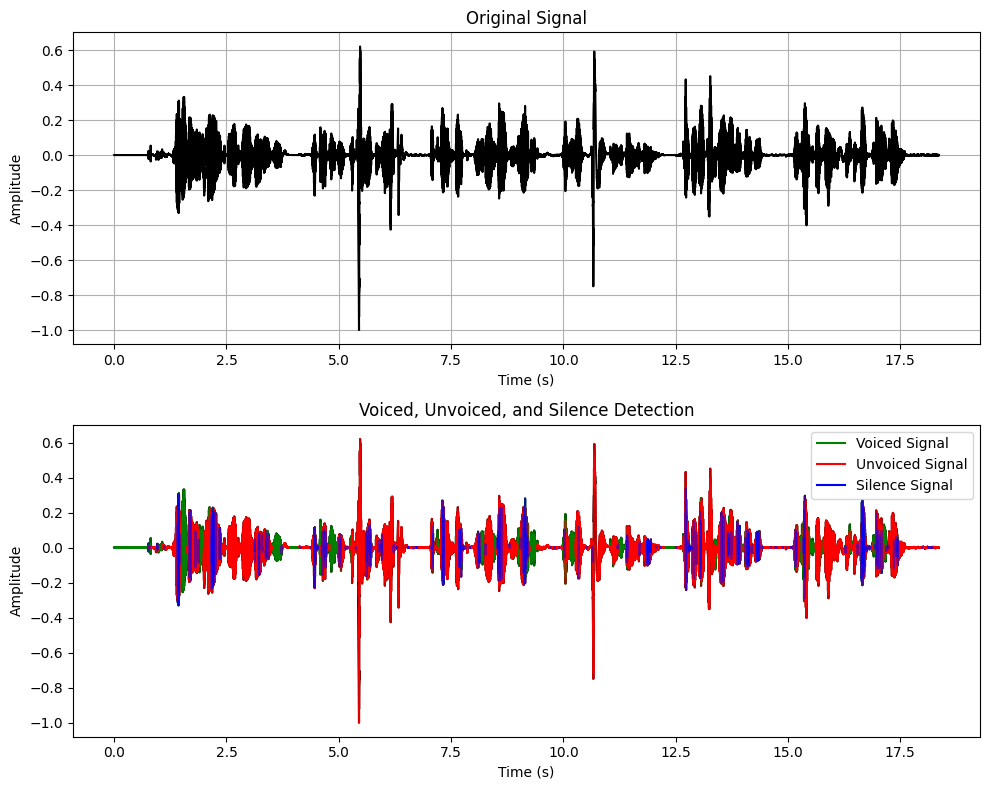

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import librosa

# Read the audio file
y, fs = librosa.load(r"C:\Users\syedm\OneDrive\Desktop\new folder\harvard.wav", sr=None)

# Define frame size and overlap (in samples)
frame_size = 256
overlap = 128

# Calculate number of frames
num_frames = (len(y) - frame_size) // (frame_size - overlap) + 1

# Initialize variables
voiced_frames = []
unvoiced_frames = []
silence_frames = []

# Iterate through each frame
for i in range(num_frames):
    # Extract current frame
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    frame = y[start_idx:end_idx]

    # Calculate energy of the frame
    energy = np.sum(np.abs(frame)**2)

    # Calculate zero-crossing rate (ZCR)
    zcr = np.sum(np.diff(np.sign(frame)) != 0)

    # Thresholds for voiced, unvoiced, and silence detection
    voiced_threshold = 0.01 * np.max(energy)  # adjust threshold based on your audio
    unvoiced_threshold = 0.001 * np.max(energy)  # adjust threshold based on your audio
    silence_threshold = 0.0001 * np.max(energy)  # adjust threshold based on your audio

    # Identify frame type based on energy and ZCR
    if energy > voiced_threshold and zcr > 10:  # adjust values for voiced detection
        voiced_frames.append(i)
    elif energy > unvoiced_threshold and zcr < 10:  # adjust values for unvoiced detection
        unvoiced_frames.append(i)
    else:
        silence_frames.append(i)

# Calculate time axis for plotting
time_axis = np.arange(len(y)) / fs

# Plot the original signal and the segmented parts
plt.figure(figsize=(10, 8))

# Original Signal
plt.subplot(2, 1, 1)
plt.plot(time_axis, y, 'k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.grid(True)

# Voiced, Unvoiced, and Silence Detection
plt.subplot(2, 1, 2)
plt.plot(time_axis, y, 'k')

# Plot voiced segments
for i in voiced_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'g', alpha=0.5)

# Plot unvoiced segments
for i in unvoiced_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'r', alpha=0.5)

# Plot silence segments
for i in silence_frames:
    start_idx = i * (frame_size - overlap)
    end_idx = start_idx + frame_size
    plt.plot(time_axis[start_idx:end_idx], y[start_idx:end_idx], 'b', alpha=0.5)

# Create custom legend entries
legend_elements = [
    Line2D([0], [0], color='g', label='Voiced Signal'),
    Line2D([0], [0], color='r', label='Unvoiced Signal'),
    Line2D([0], [0], color='b', label='Silence Signal')
]

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Voiced, Unvoiced, and Silence Detection')
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()
